In [1]:
%load_ext lab_black

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# irisから花のデータをダウンロード

In [3]:
s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
print("URL:", s)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [4]:
df = pd.read_csv(s, header=None, encoding="utf-8")
df.head()
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# AIで判定しやすそうか確認
150このデータに３この花が50個ずつあるので、最初の100個のデータで2つの花が分類しやすそうか確認する

In [5]:
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)
X = df.iloc[0:100, [0, 2]].values

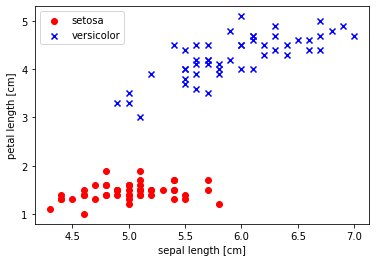

In [6]:
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.show()

分類しやすそうなデータになっている
試しに別の特徴量でも見てみる

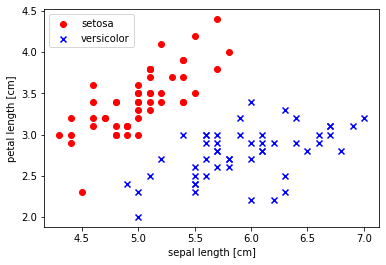

In [7]:
X = df.iloc[0:100, [0, 1]].values

plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.show()

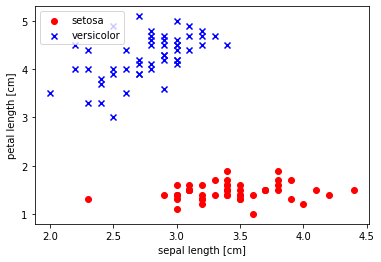

In [8]:
X = df.iloc[0:100, [1, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.show()

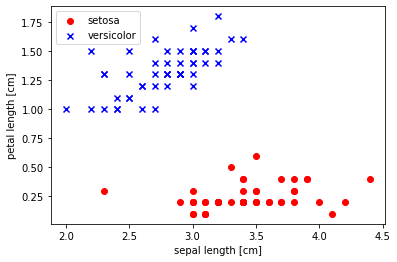

In [9]:
X = df.iloc[0:100, [1, 3]].values

plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.show()

基本的にどれも分類しやすそう

## 実際に学習してみる

In [10]:
from perceptron import Perceptron

In [11]:
X = df.iloc[0:100, [0, 2]].values

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

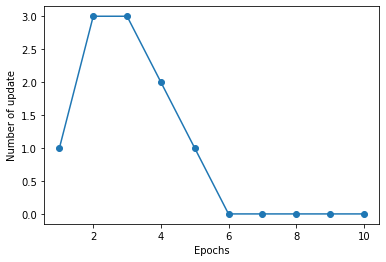

In [12]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of update")
plt.show()

In [13]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    print(x1_max, x1_min)
    print(x2_max, x2_min)
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)
    )
    print(xx1)
    print(len(xx1))
    print(xx1)
    print(len(xx2))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor="black",
        )

8.0 3.3
6.1 0.0
[[3.3  3.32 3.34 ... 7.94 7.96 7.98]
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]
 ...
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]]
305
[[3.3  3.32 3.34 ... 7.94 7.96 7.98]
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]
 ...
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]]
305


/tmp/ipykernel_19870/3316074633.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


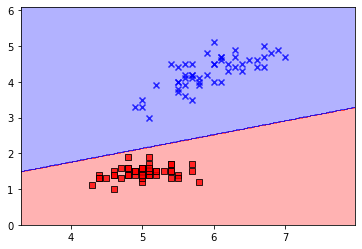

In [14]:
plot_decision_regions(X, y, ppn)

In [15]:
from adaline import AdalineGD, AdalineSGD

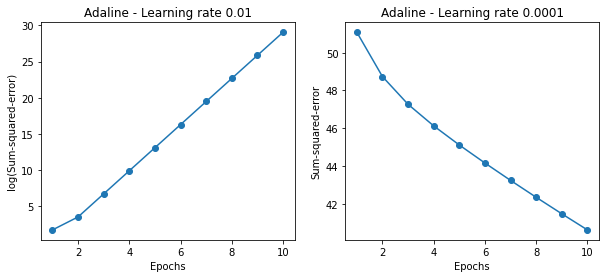

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker="o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Sum-squared-error)")
ax[0].set_title("Adaline - Learning rate 0.01")

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker="o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Sum-squared-error")
ax[1].set_title("Adaline - Learning rate 0.0001")

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [17]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

3.394743306307442 -2.834038202541543
2.552761011830878 -2.291886060781545
[[-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 ...
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]]
243
[[-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 ...
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]]
243


/tmp/ipykernel_19870/3316074633.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


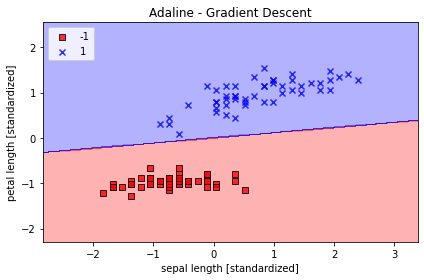

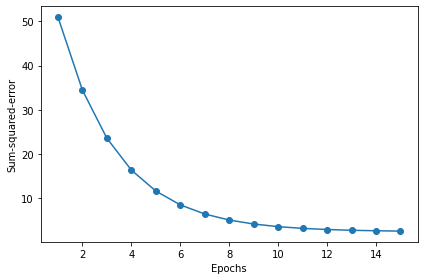

In [18]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title("Adaline - Gradient Descent")
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal length [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Sum-squared-error")

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

3.394743306307442 -2.834038202541543
2.552761011830878 -2.291886060781545
[[-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 ...
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]]
243
[[-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 ...
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]]
243


/tmp/ipykernel_19870/3316074633.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


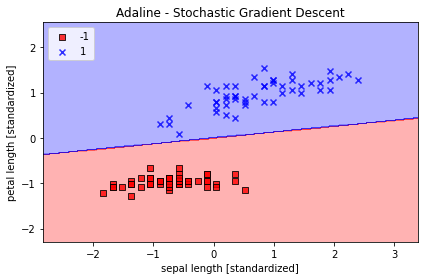

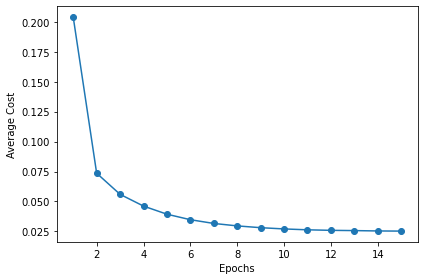

In [19]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title("Adaline - Stochastic Gradient Descent")
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal length [standardized]")
plt.legend(loc="upper left")

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Average Cost")

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()